In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pygimli as pg
from pygimli.physics import ert

# November 24 ERT 1

In [45]:
data3 = ert.load('Surveys/full_data/nov24_1.dat')
print(data3)

Data: Sensors: 64 data: 2123, nonzero entries: ['a', 'b', 'ip', 'm', 'n', 'r', 'valid']


In [46]:
data3["k"] = ert.geometricFactors(data3)
data3["err"] = ert.estimateError(data3, relativeError=0.02, absoluteUError=50e-6)
data3["rhoa"] = data3["r"] * data3["k"]

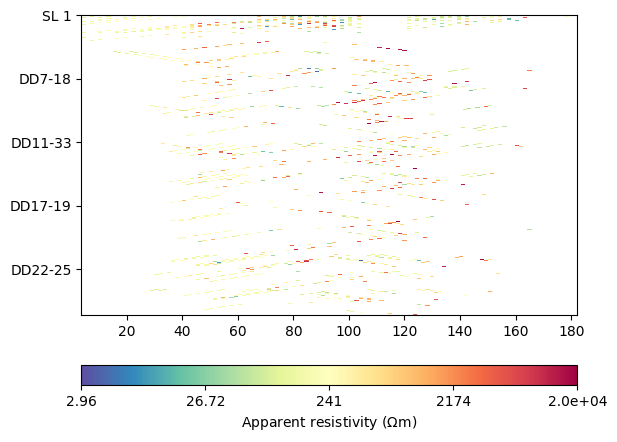

In [47]:
ax, cb = ert.show(data3)

<Axes: ylabel='Count'>

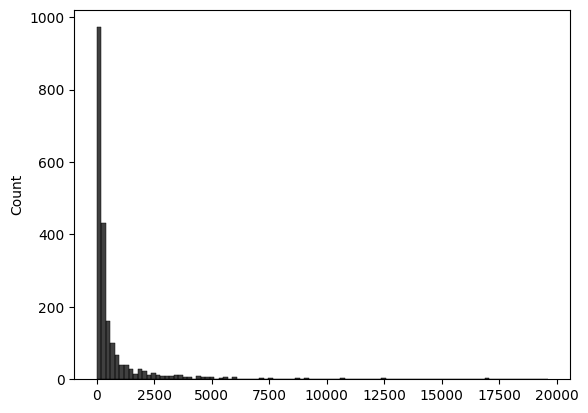

In [48]:
import seaborn as sns
sns.histplot(data3["rhoa"], bins=100, color="k", label="rhoa")

In [ ]:
sns.histplot(data3["err"], bins=100, color="r", label="err")

In [49]:
import numpy as np
import pandas as pd

data3_rhoa_array = np.array(data3["rhoa"])
data3_rhoa_series = pd.Series(data3_rhoa_array)
quantile_95 = data3_rhoa_series.quantile(0.95)
quantile_95

4328.401843302023

In [50]:
#data3.remove(data3["rhoa"] > quantile_95)

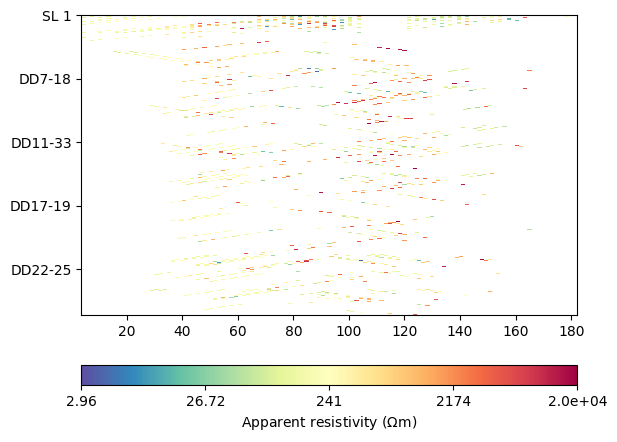

In [51]:
ax, cb = ert.show(data3)

In [52]:
mgr3 = ert.ERTManager(data3, verbose=True)
mgr3.invert(secNodes=1, paraMaxCellSize=10.0, 
            zWeight=0.2, verbose=1)

16/02/24 - 01:28:40 - pyGIMLi - INFO - Found 2 regions.
16/02/24 - 01:28:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/02/24 - 01:28:40 - pyGIMLi - INFO - Found 2 regions.
16/02/24 - 01:28:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/02/24 - 01:28:40 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/02/24 - 01:28:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  4

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  4

Statistics:

  Input vertices: 135
  Input segments: 136
  Input holes: 0

  Mesh vertices: 2191
  Mesh triangles: 4211
  Mesh edges: 6401
  Mesh exterior boundary edges: 169
  Mesh interior boundary edges: 100
  Mesh subsegments (constrained edges): 269



16/02/24 - 01:28:41 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8592 Cells: 16844 Boundaries: 12802
16/02/24 - 01:28:41 - pyGIMLi - INFO - Use median(data values)=224.90169044360564
16/02/24 - 01:28:41 - pyGIMLi - INFO - Created startmodel from forward operator: 3379 [224.90169044360564,...,224.90169044360564]
16/02/24 - 01:28:41 - pyGIMLi - INFO - Starting inversion.


ModellingBase::setMesh() copying new mesh ... Found topography for surface=1518.6 : 1518.48
Found datafile: 64 electrodes
Found: 64 node-electrodes
rMin = 1.51017, rMax = 382.049
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.0514874 s
FOP updating mesh dependencies ... 2.9e-06 s
min/max(dweight) = 1.85271/49.9578
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7fd4c20d4680>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7fd4b6113c40>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x7fd4c28e7290>
min/max (data): 2.96/2.0e+04
min/max (error): 2%/53.98%
min/max (start model): 225/225
--------------------------------------------------------------------------------
use model trans from RegionManager
Calculating response for model: min = 224.902 max = 224.902
Allocating memory for primary potential...... 0.0050111

No primary potential for secondary field calculation with topography.
Crea

16/02/24 - 01:33:12 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(inversion.py:676)
One step failed. Aborting and going back to last model


14.9497s
sens sum: median = 7.42603 min = 0.648012 max = 136.968
... 14.9696 s
solve CGLSCDWWtrans with lambda = 20
Calculating response for model: min = 1.73192e-08 max = 6.17346e+10
Using existing primary potentials.
Forward: time: 7.73497s
Found neg. resp (saving).
11 -0.439673 7.18915
0 6 14 15
Response: min = -4.92304e+08 max = ./core/src/inversion.cpp:95		double GIMLI::RInversion::getPhiD(const Vec&) const  getPhiD == inf
3.69025e+07 mean = -847802
Reciprocity rms(modelReciprocity) 1052.54%, max: 38633.9%
chi² = 1953.82 (dPhi = 0.0%) lam: 20.0
################################################################################
#                 Abort criteria reached: dPhi = 0.0 (< 2.0%)                  #
################################################################################


3379 [125.33759603843166,...,279.6679882742275]

(1480.0, 1537.517944)

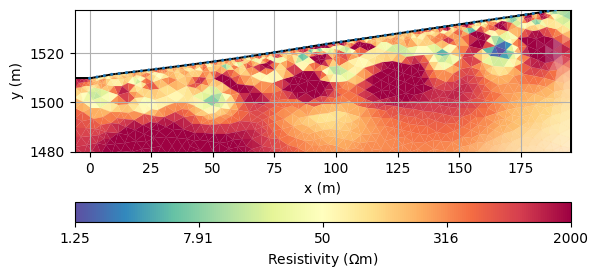

In [61]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0, cMax=2000)
ax, cb = mgr3.showResult(**kw)
ax.grid(True)
ax.set_ylim([1480, ax.get_ylim()[1]])